In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import json

In [5]:
#chroms = [str(x) for x in range(1, 23)]
chroms = ['10']
data_dir = '../../DATA/spark/genotypes'
deletion_dir = '../phased_spark_quads_del'

In [6]:
# From GRCh37.p13 https://www.ncbi.nlm.nih.gov/grc/human/data?asm=GRCh37.p13
chrom_lengths = {
	'1': 249250621,
	'2': 243199373,
	'3': 198022430,
	'4': 191154276,
	'5': 180915260,
	'6': 171115067,
	'7': 159138663,
	'8': 146364022,
	'9': 141213431,
	'10': 135534747,
	'11': 135006516,
	'12': 133851895,
	'13': 115169878,
	'14': 107349540,
	'15': 102531392,
	'16': 90354753,
	'17': 81195210,
	'18': 78077248,
	'19': 59128983,
	'20': 63025520,
	'21': 48129895,
	'22': 51304566,
	'X': 155270560,
	'Y': 59373566
}

chrom_offsets = [0]
for chrom in chroms:
    chrom_offsets.append(chrom_offsets[-1]+chrom_lengths[chrom])
print(chrom_offsets)

[0, 135534747]


# Filter collections

In [7]:
all_positions = [np.load('%s/chr.%s.positions.npy' % (data_dir, chrom)) for chrom in chroms]
stacked_start_pos = np.vstack([x+chrom_offsets[i] for i, x in enumerate(all_positions)])[:, 0]
print(stacked_start_pos)


FileNotFoundError: [Errno 2] No such file or directory: '../../DATA/spark/genotypes/chr.10.positions.npy'

In [9]:
stacked_pos = np.vstack([np.hstack([(i+1)*np.ones((x.shape[0], 1)), x]) for i, x in enumerate(all_positions)])


# Transmission Rates

In [10]:
print(stacked_start_pos.shape)

(51989,)


In [11]:
all_transrates = [np.load('%s/chr.%s.transrates.npz' % (deletion_dir, chrom)) for chrom in chroms]

stacked_transrates_aff = np.hstack([x['aff'] for x in all_transrates])
stacked_transrates_unaff = np.hstack([x['unaff'] for x in all_transrates])
stacked_transrates_aff_m = np.hstack([x['aff_m'] for x in all_transrates])
stacked_transrates_unaff_m = np.hstack([x['unaff_m'] for x in all_transrates])
stacked_transrates_aff_f = np.hstack([x['aff_f'] for x in all_transrates])
stacked_transrates_unaff_f = np.hstack([x['unaff_f'] for x in all_transrates])

#stacked_transrates_aff_mat = np.hstack([x['aff_mat'] for x in all_transrates])
#stacked_transrates_unaff_mat = np.hstack([x['unaff_mat'] for x in all_transrates])
#stacked_transrates_aff_pat = np.hstack([x['aff_pat'] for x in all_transrates])
#stacked_transrates_unaff_pat = np.hstack([x['unaff_pat'] for x in all_transrates])


All Affected Unaffected 0.49087907325954333 0.49823268758919176
Ttest_indResult(statistic=-10.136866450532949, pvalue=4.627643345203803e-24)
Males Affected Unaffected 0.4942068515273735 0.499281805534941
Ttest_indResult(statistic=-5.223554249895185, pvalue=1.7862168891234864e-07)
Females Affected Unaffected 0.4982341218217247 0.4991796899349266
Ttest_indResult(statistic=1.1744063293047766, pvalue=0.24027148964010323)
Affected Males Females 0.4942068515273735 0.4982341218217247
Ttest_indResult(statistic=-7.44462180843587, pvalue=1.0271652873649526e-13)
Unaffected Males Females 0.499281805534941 0.4991796899349266
Ttest_indResult(statistic=0.9271720978944483, pvalue=0.35389197585029675)


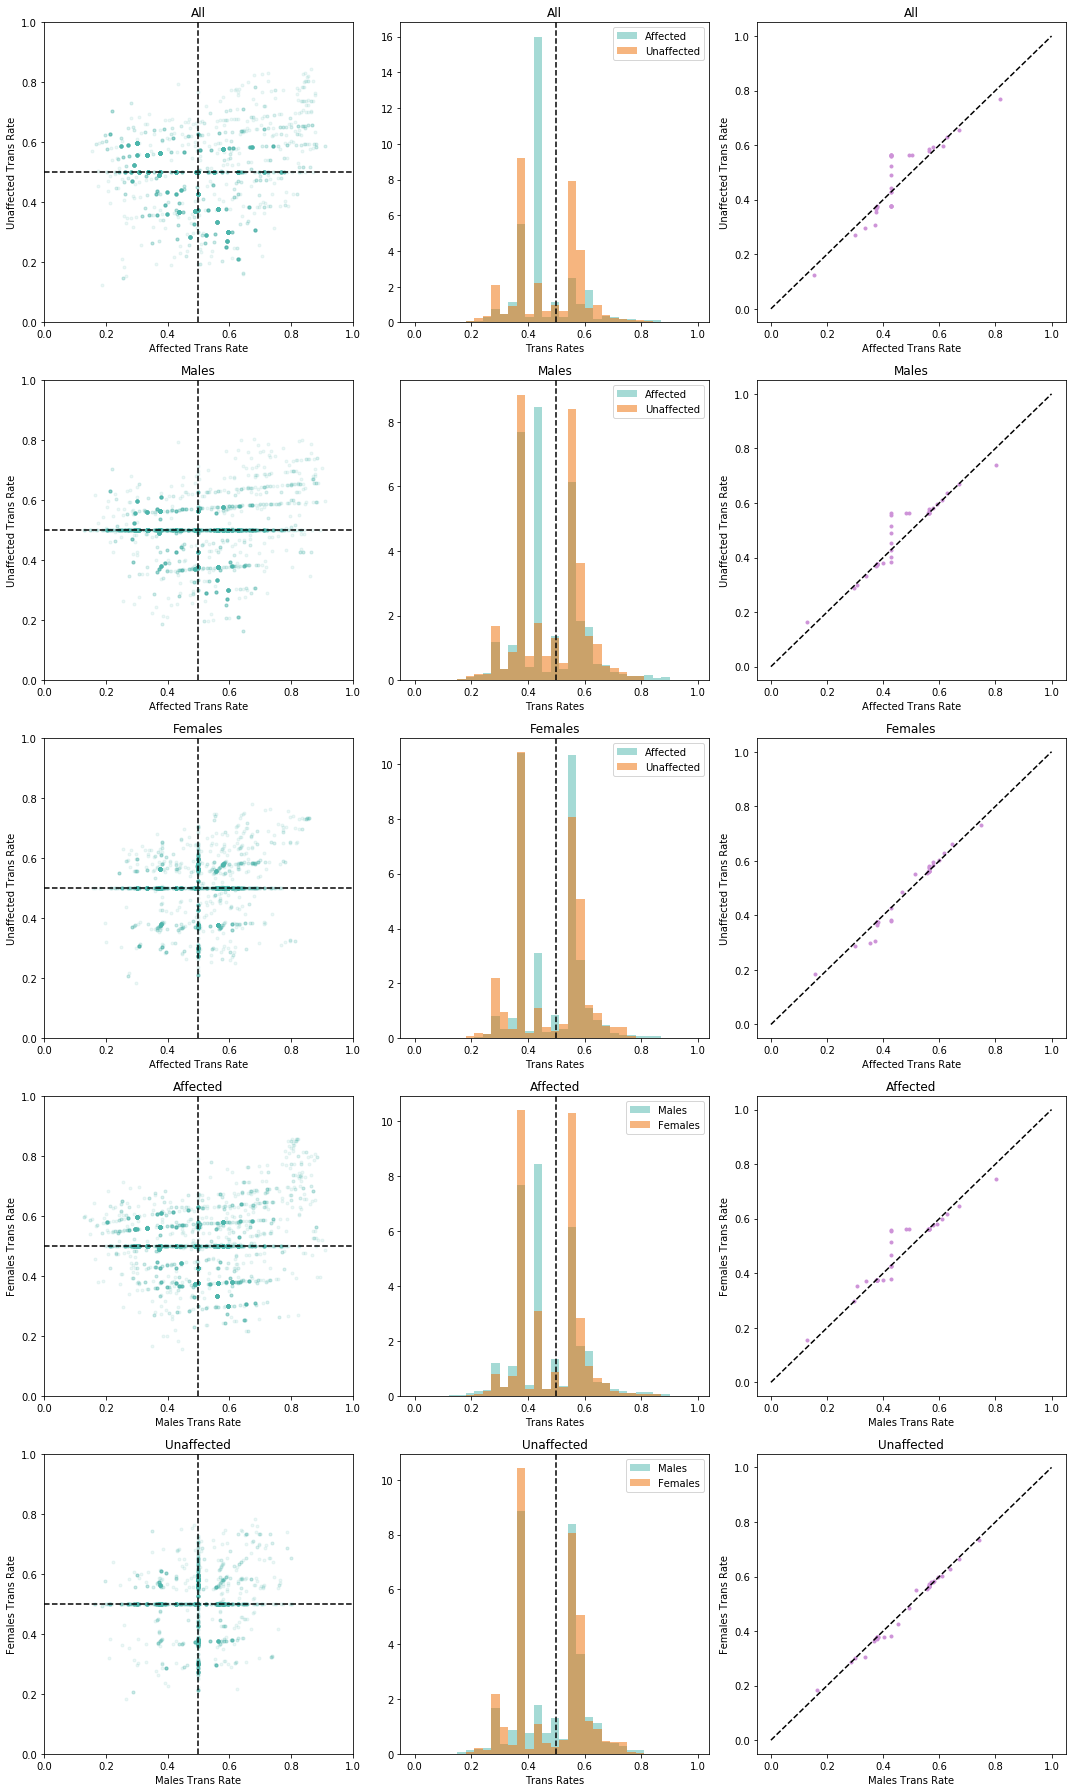

In [12]:

to_plot = [
    ('All', 'Affected', 'Unaffected', stacked_transrates_aff, stacked_transrates_unaff),
    ('Males', 'Affected', 'Unaffected', stacked_transrates_aff_m, stacked_transrates_unaff_m),
    ('Females', 'Affected', 'Unaffected', stacked_transrates_aff_f, stacked_transrates_unaff_f),
    #('Maternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_mat, stacked_transrates_filtered_unaff_mat),
    #('Paternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_pat, stacked_transrates_filtered_unaff_pat),
    ('Affected', 'Males', 'Females', stacked_transrates_aff_m, stacked_transrates_aff_f),
    ('Unaffected', 'Males', 'Females', stacked_transrates_unaff_m, stacked_transrates_unaff_f),
    #('Affected', 'Maternal', 'Paternal', stacked_transrates_filtered_aff_mat, stacked_transrates_filtered_aff_pat),
    #('Unaffected', 'Maternal', 'Paternal', stacked_transrates_filtered_unaff_mat, stacked_transrates_filtered_unaff_pat)
]

plt.figure(figsize=(15, 5*len(to_plot)))


for i, (title, label1, label2, transrates1, transrates2) in enumerate(to_plot):
    
    # Scatter
    plt.subplot(len(to_plot), 3, 3*i + 1)
    plt.scatter(transrates1, transrates2, alpha=0.1, marker='.', color='#4db6ac')
    plt.xlabel('%s Trans Rate' % label1)
    plt.ylabel('%s Trans Rate' % label2)
    plt.axhline(0.5, color='black', linestyle='--')
    plt.axvline(0.5, color='black', linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(title)

    # Hist
    bins = np.arange(0, 1, 0.03)

    plt.subplot(len(to_plot), 3, 3*i + 2)
    plt.hist(transrates1[transrates1 != 0.5], bins=bins, alpha=0.5, density=True, label=label1, color='#4db6ac') 
    plt.hist(transrates2[transrates2 != 0.5], bins=bins, alpha=0.5, density=True, label=label2, color='#ef6c00')
    print(title, label1, label2, np.nanmean(transrates1), np.nanmean(transrates2))
    plt.title(title)
    plt.xlabel('Trans Rates')
    plt.legend()
    plt.axvline(0.5, color='black', linestyle='--')

    # QQ plot
    plt.subplot(len(to_plot), 3, 3*i + 3)
    plt.scatter(np.nanquantile(transrates1[transrates1 != 0.5], bins), 
                np.nanquantile(transrates2[transrates2 != 0.5], bins), marker='.', color='#ce93d8ff')
    plt.title(title)
    plt.xlabel('%s Trans Rate' % label1)
    plt.ylabel('%s Trans Rate' % label2)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    
    print(scipy.stats.ttest_ind(transrates1[transrates1 != 0.5], transrates2[transrates2 != 0.5]))

plt.tight_layout()
plt.show()

# Posterior pvalues

In [13]:
all_posterior_overlaps = [np.load('%s/chr.%s.posterior_overlaps.npz' % (deletion_dir, chrom)) for chrom in chroms]

stacked_posterior_overlaps = np.hstack([x['all'] for x in all_posterior_overlaps])
stacked_posterior_overlaps_m = np.hstack([x['m'] for x in all_posterior_overlaps])
stacked_posterior_overlaps_f = np.hstack([x['f'] for x in all_posterior_overlaps])



3507


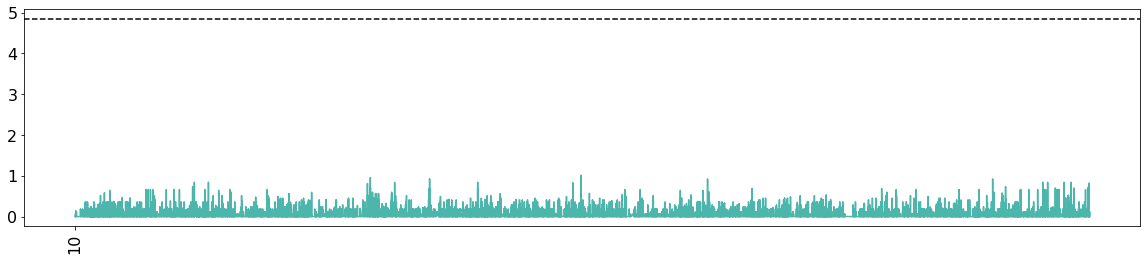

In [14]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(20, 4))

print(np.sum(stacked_transrates_unaff != 0.5))
cutoff = -np.log10(0.05/np.sum(stacked_transrates_unaff != 0.5))

for i in range(len(chroms)):
    plt.plot(all_positions[i][:, 0] + chrom_offsets[i], -np.log10(all_posterior_overlaps[i]['all']), 
             label='all', color='#4db6ac' if i%2==0 else '#ef6c00')

    #plt.plot(stacked_start_pos, -np.log10(stacked_posterior_overlaps_m), label='m', alpha=0.5)
#plt.plot(stacked_start_pos, -np.log10(stacked_posterior_overlaps_f), label='f', alpha=0.5)

plt.axhline(cutoff, linestyle='--', color='black')
#plt.ylabel('-log10(pvalue)')
#plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms, rotation=90)
#plt.title('Overlap Pvalues')
#plt.legend()

plt.show()

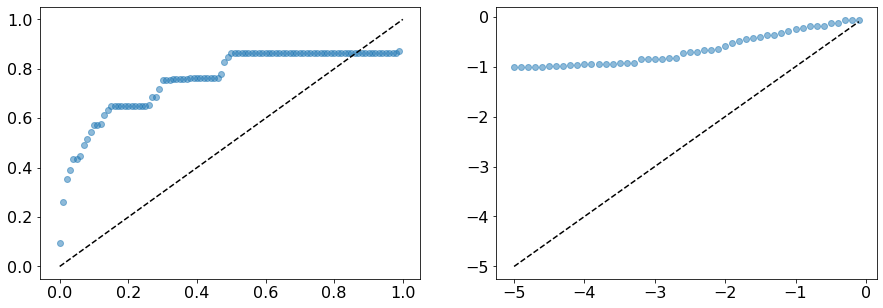

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
bins = np.arange(0, 1, 0.01)
plt.scatter(bins, np.quantile(stacked_posterior_overlaps[stacked_posterior_overlaps != 1], bins), alpha=0.5)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.subplot(1, 2, 2)
bins = np.arange(-5, 0, 0.1)
plt.scatter(bins, np.log10(np.quantile(stacked_posterior_overlaps[stacked_posterior_overlaps != 1], np.power(10.0, bins))), alpha=0.5)
plt.plot(bins, bins, color='black', linestyle='--')
plt.show()

In [16]:
all_posterior_pvalues = [np.load('%s/chr.%s.posterior_pvalues.npz' % (deletion_dir, chrom)) for chrom in chroms]

stacked_posterior_pvalues_aff = np.vstack([x['aff'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff = np.vstack([x['unaff'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_aff_m = np.vstack([x['aff_m'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff_m = np.vstack([x['unaff_m'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_aff_f = np.vstack([x['aff_f'] for x in all_posterior_pvalues])
stacked_posterior_pvalues_unaff_f = np.vstack([x['unaff_f'] for x in all_posterior_pvalues])
#stacked_posterior_pvalues_aff_mat = np.vstack([x['aff_mat'] for x in all_posterior_pvalues])
#stacked_posterior_pvalues_unaff_mat = np.vstack([x['unaff_mat'] for x in all_posterior_pvalues])
#stacked_posterior_pvalues_aff_pat = np.vstack([x['aff_pat'] for x in all_posterior_pvalues])
#stacked_posterior_pvalues_unaff_pat = np.vstack([x['unaff_pat'] for x in all_posterior_pvalues])


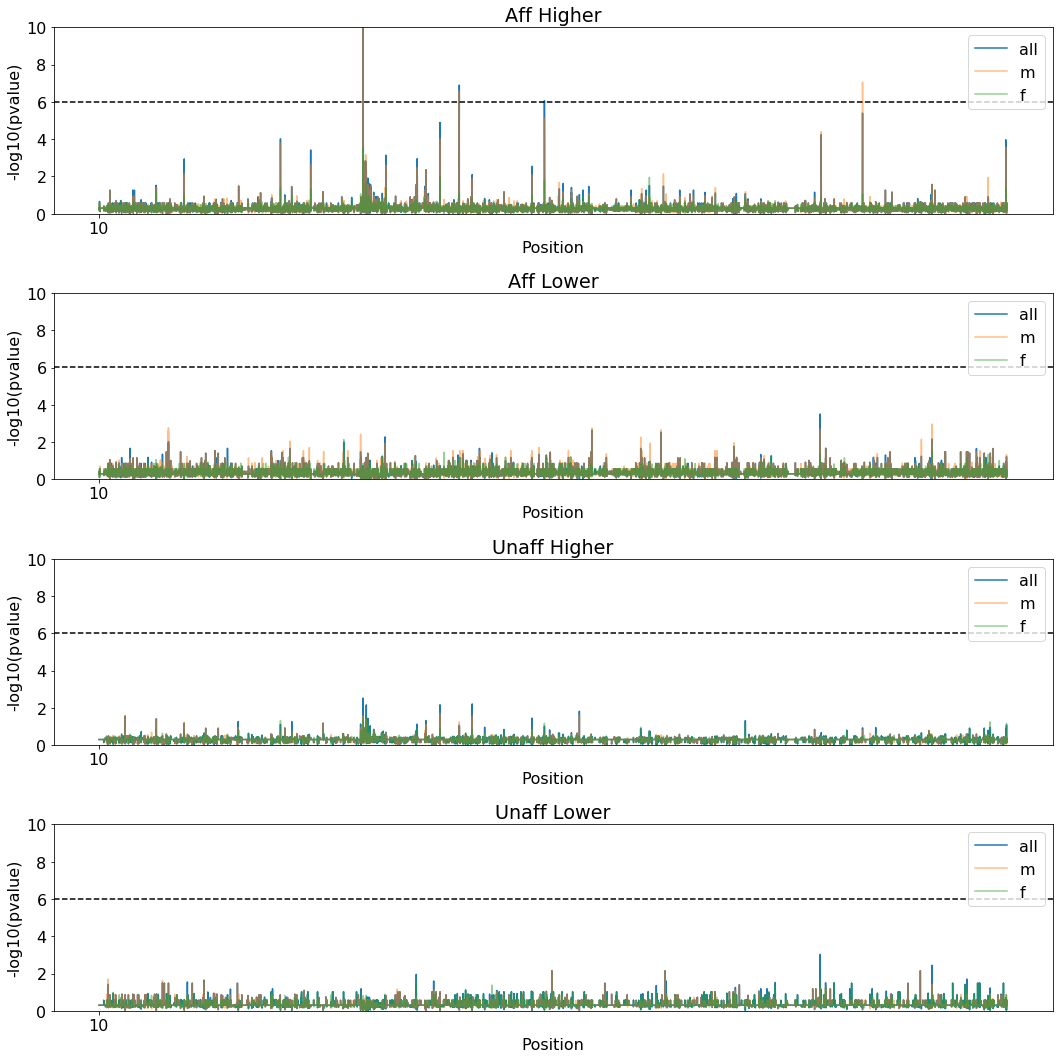

In [21]:
plt.figure(figsize=(15, 15))

cutoff = -np.log10(0.05/stacked_start_pos.shape[0])

plt.subplot(4, 1, 1)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff[:, 0]), label='all')
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff_m[:, 0]), label='m', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff_f[:, 0]), label='f', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_mat[:, 0]), label='mat', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_pat[:, 0]), label='pat', alpha=0.5)
#plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff[:, 0]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Aff Higher')
plt.legend()
plt.ylim([0, 10])

plt.subplot(4, 1, 2)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff[:, 1]), label='all')
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff_m[:, 1]), label='m', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff_f[:, 1]), label='f', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_mat[:, 1]), label='mat', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_aff_pat[:, 1]), label='pat', alpha=0.5)
#plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_aff[:, 1]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Aff Lower')
plt.legend()  
plt.ylim([0, 10])

plt.subplot(4, 1, 3)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff[:, 0]), label='all')
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff_m[:, 0]), label='m', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff_f[:, 0]), label='f', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_mat[:, 0]), label='mat', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_pat[:, 0]), label='pat', alpha=0.5)
#plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff[:, 0]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Unaff Higher')
plt.legend()
plt.ylim([0, 10])

plt.subplot(4, 1, 4)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff[:, 1]), label='all')
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff_m[:, 1]), label='m', alpha=0.5)
plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff_f[:, 1]), label='f', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_mat[:, 1]), label='mat', alpha=0.5)
#plt.plot(stacked_start_pos_filtered, -np.log10(stacked_posterior_pvalues_filtered_unaff_pat[:, 1]), label='pat', alpha=0.5)
#plt.plot(stacked_start_pos, -np.log10(stacked_posterior_pvalues_unaff[:, 1]), label='unfiltered', alpha=0.1)
plt.axhline(cutoff, linestyle='--', color='black')
plt.ylabel('-log10(pvalue)')
plt.xlabel('Position')
plt.xticks(chrom_offsets[:-1], chroms)
plt.title('Unaff Lower')
plt.legend()
plt.ylim([0, 10])

plt.tight_layout()
plt.show()

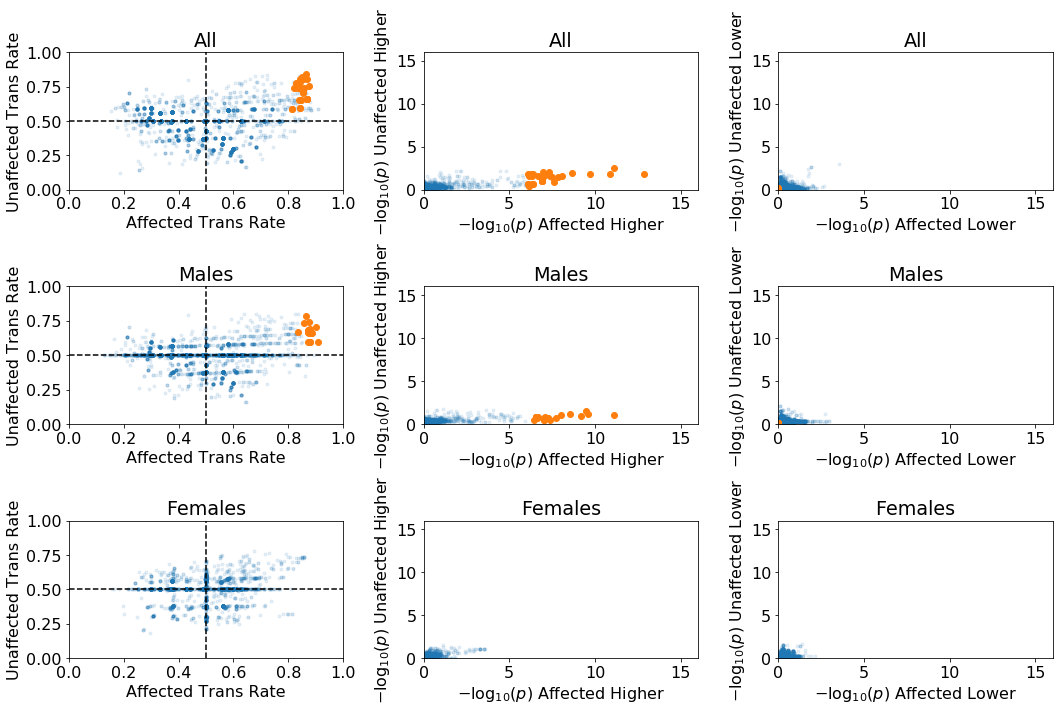

In [22]:
plt.figure(figsize=(15, 10))

to_plot = [
    ('All', 'Affected', 'Unaffected', stacked_transrates_aff, stacked_transrates_unaff, stacked_posterior_pvalues_aff, stacked_posterior_pvalues_unaff),
    ('Males', 'Affected', 'Unaffected', stacked_transrates_aff_m, stacked_transrates_unaff_m, stacked_posterior_pvalues_aff_m, stacked_posterior_pvalues_unaff_m),
    ('Females', 'Affected', 'Unaffected', stacked_transrates_aff_f, stacked_transrates_unaff_f, stacked_posterior_pvalues_aff_f, stacked_posterior_pvalues_unaff_f),
    #('Maternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_mat, stacked_transrates_filtered_unaff_mat, stacked_posterior_pvalues_filtered_aff_mat, stacked_posterior_pvalues_filtered_unaff_mat),
    #('Paternal', 'Affected', 'Unaffected', stacked_transrates_filtered_aff_pat, stacked_transrates_filtered_unaff_pat, stacked_posterior_pvalues_filtered_aff_pat, stacked_posterior_pvalues_filtered_unaff_pat),
]

for i, (title, label1, label2, transrates1, transrates2, pvalues1, pvalues2) in enumerate(to_plot):
    
    indices = -np.log10(pvalues1)>=cutoff
    higher_indices1 = indices[:, 0]
    lower_indices1 = indices[:, 1]
    indices = -np.log10(pvalues2)>=cutoff
    higher_indices2 = indices[:, 0]
    lower_indices2 = indices[:, 1]
    
    # Transrate plot
    plt.subplot(len(to_plot), 3, 3*i + 1)
    plt.scatter(transrates1, transrates2, alpha=0.1, marker='.')

    plt.scatter(transrates1[higher_indices1], transrates2[higher_indices1], label='%s higher' % label1)
    plt.scatter(transrates1[lower_indices1], transrates2[lower_indices1], label='%s lower' % label1)
    plt.scatter(transrates1[higher_indices2], transrates2[higher_indices2], label='%s higher' % label2)
    plt.scatter(transrates1[lower_indices2], transrates2[lower_indices2], label='%s lower' % label2)
    
    plt.xlabel('%s Trans Rate' % label1)
    plt.ylabel('%s Trans Rate' % label2)
    plt.axhline(0.5, color='black', linestyle='--')
    plt.axvline(0.5, color='black', linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(title)
    #plt.legend()

    # Pvalue plot1
    plt.subplot(len(to_plot), 3, 3*i+2)
    p1, p2 = -np.log10(pvalues1)[:, 0], -np.log10(pvalues2)[:, 0]
    plt.scatter(np.clip(p1, 0, 15), np.clip(p2, 0, 15), alpha=0.1, marker='.')

    plt.scatter(np.clip(p1[higher_indices1], 0, 15), np.clip(p2[higher_indices1], 0, 15), label='%s higher' % label1)
    plt.scatter(np.clip(p1[lower_indices1], 0, 15), np.clip(p2[lower_indices1], 0, 15), label='%s lower' % label1)
    plt.scatter(np.clip(p1[higher_indices2], 0, 15), np.clip(p2[higher_indices2], 0, 15), label='%s higher' % label2)
    plt.scatter(np.clip(p1[lower_indices2], 0, 15), np.clip(p2[lower_indices2], 0, 15), label='%s lower' % label2)

    plt.xlabel('$-\log_{10}(p)$ %s Higher' % label1)
    plt.ylabel('$-\log_{10}(p)$ %s Higher' % label2)
    plt.title(title)
    #plt.legend()
    plt.xlim([0, 16])
    plt.ylim([0, 16])

    # Pvalue plot2
    plt.subplot(len(to_plot), 3, 3*i+3)
    p1, p2 = -np.log10(pvalues1)[:, 1], -np.log10(pvalues2)[:, 1]
    plt.scatter(np.clip(p1, 0, 15), np.clip(p2, 0, 15), alpha=0.1, marker='.')

    plt.scatter(np.clip(p1[higher_indices1], 0, 15), np.clip(p2[higher_indices1], 0, 15), label='%s higher' % label1)
    plt.scatter(np.clip(p1[lower_indices1], 0, 15), np.clip(p2[lower_indices1], 0, 15), label='%s lower' % label1)
    plt.scatter(np.clip(p1[higher_indices2], 0, 15), np.clip(p2[higher_indices2], 0, 15), label='%s higher' % label2)
    plt.scatter(np.clip(p1[lower_indices2], 0, 15), np.clip(p2[lower_indices2], 0, 15), label='%s lower' % label2)

    plt.xlabel('$-\log_{10}(p)$ %s Lower' % label1)
    plt.ylabel('$-\log_{10}(p)$ %s Lower' % label2)
    plt.title(title)
    #plt.legend()
    plt.xlim([0, 16])
    plt.ylim([0, 16])


plt.tight_layout()
plt.show()

In [23]:
print('Affected Higher')
print(stacked_pos[stacked_posterior_pvalues_aff[:, 0]< 0.05/stacked_posterior_pvalues_aff.shape[0], :].astype(int))
print('UnAffected Higher')
print(stacked_pos[stacked_posterior_pvalues_unaff[:, 0]< 0.05/stacked_posterior_pvalues_aff.shape[0], :].astype(int))
print('Affected Lower')
print(stacked_pos[stacked_posterior_pvalues_aff[:, 1]< 0.05/stacked_posterior_pvalues_aff.shape[0], :].astype(int))
print('UnAffected Lower')
print(stacked_pos[stacked_posterior_pvalues_unaff[:, 1]< 0.05/stacked_posterior_pvalues_aff.shape[0], :].astype(int))


Affected Higher
[[       1 38860830 38879853 38860676 38883701]
 [       1 38862956 38881937 38860676 38883701]
 [       1 38862956 38873625 38860831 38879848]
 [       1 38862956 38873198 38860831 38883701]
 [       1 38862956 38873198 38860831 38879848]
 [       1 38862956 38879853 38860831 38883701]
 [       1 38862956 38873625 38860676 38879848]
 [       1 38862956 38879127 38860831 38883701]
 [       1 38864365 38879853 38860676 38883701]
 [       1 38864365 38873625 38837067 38879848]
 [       1 38864365 38881937 38857203 38883996]
 [       1 38864365 38879853 38860127 38883996]
 [       1 38864365 38873625 38837067 38904924]
 [       1 38864365 38873625 38857139 38883996]
 [       1 38864384 38881937 38860676 38883996]
 [       1 38864858 38879853 38860676 38883701]
 [       1 38864858 38881937 38860676 38883701]
 [       1 38864858 38879127 38860676 38883701]
 [       1 38865053 38869766 38860676 38879848]
 [       1 38865053 38872973 38857166 38879848]
 [       1 38867136 3887

In [24]:
import statsmodels.api as sm

#all_contingency = [np.load('%s/chr.%s.contingency.npz' % (deletion_dir, chrom)) for chrom in chroms]

def printout_hits(posterior_pvalues, collections, indices, label):
    
    if indices is None:
        indices = np.ones((posterior_pvalues.shape[0],), dtype=bool)
            
    for j in np.where((-np.log10(posterior_pvalues[:, 0]) > cutoff) & indices)[0]:
        d = collections[j]['deletion']
        #aff_trans = np.sum(contingency_aff[j, :, 1])
        #aff_notrans = np.sum(contingency_aff[j, :, 0])
        #unaff_trans = np.sum(contingency_unaff[j, :, 1])
        #unaff_notrans = np.sum(contingency_unaff[j, :, 0])
        aff_n = aff_trans+aff_notrans
        unaff_n = unaff_trans+unaff_notrans
        
        #table = sm.stats.Table2x2(np.array([[aff_trans, unaff_trans], [aff_notrans, unaff_notrans]]))

        print('%s%s:%d-%d\t%d\tp=%0.2f\tor=%0.3f(%0.3f,%0.3f)\trr=%0.3f(%0.3f,%0.3f)\tan=%d\tun=%d\t%s' % ('*' if indices[j] else '',
                    d['chrom'], d['start_pos'], d['end_pos'], d['length'],
                    -np.log10(posterior_pvalues[j, 0]), 
                    #table.oddsratio, table.oddsratio_confint()[0], table.oddsratio_confint()[1], 
                    #table.riskratio, table.riskratio_confint()[0], table.riskratio_confint()[1], 
                    aff_n, unaff_n, 'higher'))
        
    for j in np.where((-np.log10(posterior_pvalues[:, 1]) > cutoff) & indices)[0]:
        d = collections[j]['deletion']
        #aff_trans = np.sum(contingency_aff[j, :, 1])
        #aff_notrans = np.sum(contingency_aff[j, :, 0])
        #unaff_trans = np.sum(contingency_unaff[j, :, 1])
        #unaff_notrans = np.sum(contingency_unaff[j, :, 0])
        aff_n = aff_trans+aff_notrans
        unaff_n = unaff_trans+unaff_notrans
        
        #table = sm.stats.Table2x2(np.array([[aff_trans, unaff_trans], [aff_notrans, unaff_notrans]]))

        print('%s%s:%d-%d\t%d\tp=%0.2f\tor=%0.3f(%0.3f,%0.3f)\trr=%0.3f(%0.3f,%0.3f)\tan=%d\tun=%d\t%s' % ('*' if indices[j] else '',
                    d['chrom'], d['start_pos'], d['end_pos'], d['length'],
                    -np.log10(posterior_pvalues[j, 1]), 
                    #table.oddsratio, table.oddsratio_confint()[0], table.oddsratio_confint()[1], 
                    #table.riskratio, table.riskratio_confint()[0], table.riskratio_confint()[1], 
                    aff_n, unaff_n, 'lower'))

for i, chrom in enumerate(chroms):
    printout_hits(all_posterior_pvalues[i]['aff'], collections[i], all_indices[i], all_contingency[i]['aff'], all_contingency[i]['unaff'], 'aff-all')
    printout_hits(all_posterior_pvalues[i]['unaff'], collections[i], all_indices[i], all_contingency[i]['aff'], all_contingency[i]['unaff'], 'unaff-all')
    printout_hits(all_posterior_pvalues[i]['aff_m'], collections[i], all_indices[i], 'aff-m')
    #printout_hits(all_posterior_pvalues[i]['unaff_m'], all_collections[i], all_indices[i], all_contingency[i]['aff_m'], all_contingency[i]['unaff_m'], 'unaff-m')
    #printout_hits(all_posterior_pvalues[i]['aff_f'], all_collections[i], all_indices[i], all_contingency[i]['aff_f'], all_contingency[i]['unaff_f'], 'aff-f')
    #printout_hits(all_posterior_pvalues[i]['unaff_f'], all_collections[i], all_indices[i], all_contingency[i]['aff_f'], all_contingency[i]['unaff_f'], 'unaff-f')
    #printout_hits(all_posterior_pvalues[i]['aff_mat'], all_collections[i], all_indices[i], all_contingency[i]['aff_mat'], all_contingency[i]['unaff_mat'], 'aff-mat')
    #printout_hits(all_posterior_pvalues[i]['unaff_mat'], all_collections[i], all_indices[i], all_contingency[i]['aff_mat'], all_contingency[i]['unaff_mat'], 'unaff-mat')
    #printout_hits(all_posterior_pvalues[i]['aff_pat'], all_collections[i], all_indices[i], all_contingency[i]['aff_pat'], all_contingency[i]['unaff_pat'], 'aff-pat')
    #printout_hits(all_posterior_pvalues[i]['unaff_pat'], all_collections[i], all_indices[i], all_contingency[i]['aff_pat'], all_contingency[i]['unaff_pat'], 'unaff-pat')



//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


NameError: name 'collections' is not defined

In [ ]:
lengths = []
for i, chrom in enumerate(chroms):
    lengths.extend([x.deletion.length for x in all_collections[i]])
lengths = np.array(lengths)

In [ ]:
plt.figure(figsize=(15, 10))

aff_pvalues = np.log10(np.vstack(posterior_pvalues_ihart_aff))
bins = np.arange(-20, 0, 0.05)
theoretical = np.sum(np.hstack(ind_indices))*(np.power(10, bins[1:]) - np.power(10, bins[:-1]))

plt.subplot(2, 2, 1)
plt.hist(aff_pvalues[np.hstack(ind_indices), 0], log=True, bins=bins, alpha=0.5)
plt.hist(aff_pvalues[np.hstack(ind_indices) & (lengths<1000), 0], log=True, bins=bins, alpha=0.5)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

plt.subplot(2, 2, 2)
plt.hist(aff_pvalues[:, 1], log=True, bins=bins)
plt.hist(aff_pvalues[lengths<1000, 1], log=True, bins=bins, alpha=0.5)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

unaff_pvalues = np.log10(np.vstack(posterior_pvalues_ihart_unaff))
bins = np.arange(-20, 0, 0.01)
theoretical = np.sum(np.hstack(ind_indices))*(np.power(10, bins[1:]) - np.power(10, bins[:-1]))

plt.subplot(2, 2, 3)
plt.hist(unaff_pvalues[:, 0], log=True, bins=bins)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

plt.subplot(2, 2, 4)
plt.hist(unaff_pvalues[:, 1], log=True, bins=bins)
plt.plot(bins[:-1][theoretical>=1], theoretical[theoretical>=1], color='black', linestyle='--')

plt.show()


In [ ]:
plt.hist(np.log10(lengths), bins=np.arange(0, 7, 0.1))
plt.show()
print(np.median(lengths), np.min(lengths), np.max(lengths), np.quantile(lengths, 0.05), np.quantile(lengths, 0.95))

In [25]:
plt.hist(np.log10(lengths[np.hstack(ind_indices)]), bins=np.arange(0, 7, 0.1))
plt.show()
print(np.median(lengths[np.hstack(ind_indices)]), 
      np.min(lengths[np.hstack(ind_indices)]), 
      np.max(lengths[np.hstack(ind_indices)]), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.05), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.95))



NameError: name 'lengths' is not defined

In [26]:
plt.hist(np.log10(lengths[np.hstack(ind_indices)]), bins=np.arange(0, 7, 0.1))
plt.show()
print(np.median(lengths[np.hstack(ind_indices)]), 
      np.min(lengths[np.hstack(ind_indices)]), 
      np.max(lengths[np.hstack(ind_indices)]), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.05), 
      np.quantile(lengths[np.hstack(ind_indices)], 0.95))



NameError: name 'lengths' is not defined